Projet_Covid

In [1]:
import pandas as pd

url = "https://static.data.gouv.fr/resources/synthese-des-indicateurs-de-suivi-de-lepidemie-covid-19/20230630-155909/table-indicateurs-open-data-dep-2023-06-30-17h59.csv"
df = pd.read_csv(url, sep=",")
df.head()

C:\Users\gerau\AppData\Local\Temp\ipykernel_19048\3518986916.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, sep=",")


,dep,date,reg,lib_dep,lib_reg,tx_pos,tx_incid,TO,R,hosp,...,dchosp,reg_rea,incid_hosp,incid_rea,incid_rad,incid_dchosp,reg_incid_rea,pos,pos_7j,cv_dose1
0,1,2020-03-18,84,Ain,Auvergne et Rhône-Alpes,NaN,NaN,0.062612,NaN,2,...,0,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020-03-19,84,Ain,Auvergne et Rhône-Alpes,NaN,NaN,0.132379,NaN,2,...,0,79,1.0,0.0,0.0,0.0,44.0,NaN,NaN,NaN
2,1,2020-03-20,84,Ain,Auvergne et Rhône-Alpes,NaN,NaN,0.155635,NaN,2,...,0,87,0.0,0.0,1.0,0.0,16.0,NaN,NaN,NaN
3,1,2020-03-21,84,Ain,Auvergne et Rhône-Alpes,NaN,NaN,0.173524,NaN,4,...,0,88,3.0,0.0,0.0,0.0,15.0,NaN,NaN,NaN
4,1,2020-03-22,84,Ain,Auvergne et Rhône-Alpes,NaN,NaN,0.212880,NaN,8,...,0,106,3.0,1.0,1.0,0.0,25.0,NaN,NaN,NaN


In [2]:
import datetime as dt
import matplotlib.pyplot as plt

print("\n Before transformations:\n")
print(df.dtypes)

if(df.date.dtype == 'object'):
    transfo_date = lambda x : dt.datetime.strptime(x, "%Y-%m-%d")
    df.date = df['date'].apply(transfo_date)

if(df.lib_dep.dtype == 'object'):
    df.lib_dep = df.lib_dep.astype('string')
if(df.lib_reg.dtype == 'object'):
    df.lib_reg = df.lib_reg.astype('string')

print("\n After transformations:\n")
print(df.dtypes)



 Before transformations:

dep               object
date              object
reg                int64
lib_dep           object
lib_reg           object
tx_pos           float64
tx_incid         float64
TO               float64
R                float64
hosp               int64
rea                int64
rad                int64
dchosp             int64
reg_rea            int64
incid_hosp       float64
incid_rea        float64
incid_rad        float64
incid_dchosp     float64
reg_incid_rea    float64
pos              float64
pos_7j           float64
cv_dose1         float64
dtype: object

 After transformations:

dep                      object
date             datetime64[ns]
reg                       int64
lib_dep          string[python]
lib_reg          string[python]
tx_pos                  float64
tx_incid                float64
TO                      float64
R                       float64
hosp                      int64
rea                       int64
rad                       int64

# KPI (Infos générale)

# Graphiques des critères

## Évolution des cas COVID-19 en France 

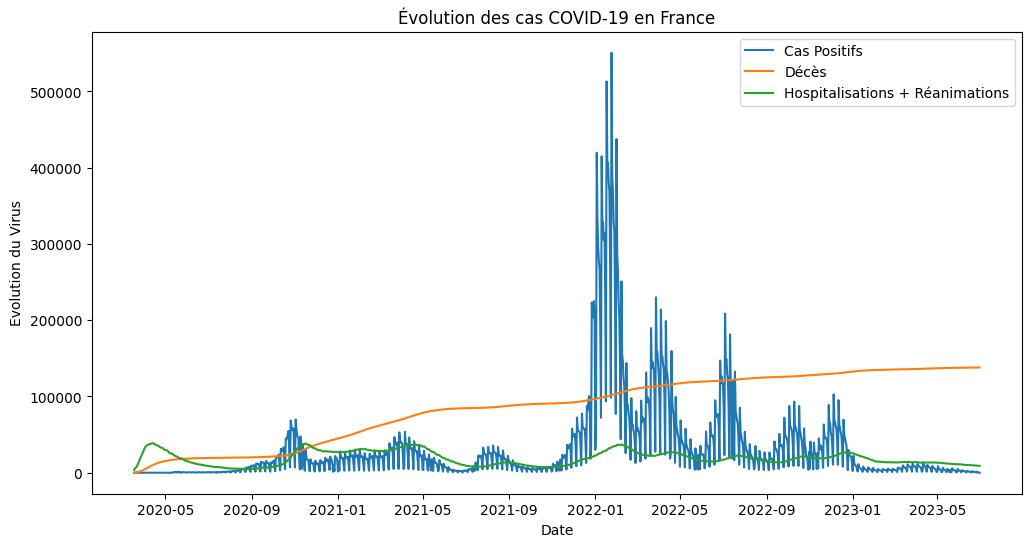

In [17]:
cas = df.groupby('date')['pos'].sum().reset_index(drop=True) 
mort = df.groupby('date')['dchosp'].sum().reset_index(drop=True)
hosp = df.groupby('date')['hosp'].sum().reset_index(drop=True) + df.groupby('date')['rea'].sum().reset_index(drop=True)
date = df.groupby('date')['date'].first().reset_index(drop=True)

plt.figure(figsize=(12, 6))
plt.plot(date, cas, label='Cas Positifs')
plt.plot(date, mort, label='Décès')
plt.plot(date, hosp, label='Hospitalisations + Réanimations')
plt.xlabel('Date')
plt.ylabel('Evolution du Virus')
plt.title('Évolution des cas COVID-19 en France')
plt.legend()
plt.show()



# Carte de distribution